                                    Simple Linear Regression Model 1

In [1]:
# Taking independent variable as SIZE=HEIGHT*WIDTH, PRICE as dependent

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
data_set = pd.read_csv(r"monet.csv")

In [5]:
data_set.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [5]:
data_set.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000


In [6]:
data_set_1 = data_set.copy()

In [7]:
data_set_1["SIZE"] = data_set_1["HEIGHT"]*data_set_1["WIDTH"]

In [8]:
data_set_1.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


In [9]:
# Model_1
# Here the independent variable is SIZE and dependent is PRICE
# Plotting the data

In [10]:
data_frame_1 = pd.DataFrame(data=data_set_1)

<AxesSubplot:xlabel='SIZE', ylabel='PRICE'>

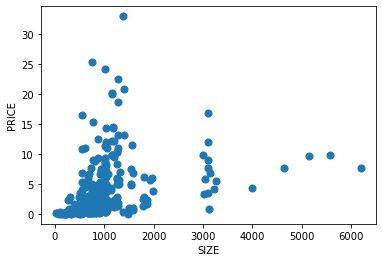

In [11]:
data_frame_1.plot.scatter(x="SIZE", y="PRICE", s=50)

In [12]:
X_1, Y_1 = data_frame_1["SIZE"], data_frame_1["PRICE"]
X_1 = X_1.to_numpy().reshape(-1,1)
Y_1 = Y_1.to_numpy().reshape(-1,1)

In [13]:
X_1.shape
Y_1.shape

(430, 1)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size = 0.02)

In [16]:
Y_test_1.shape

(9, 1)

In [17]:
model_1 = LinearRegression()

In [18]:
model_1.fit(X_train_1, Y_train_1)

LinearRegression()

In [19]:
predict_1 = model_1.predict(X_test_1)

In [20]:
theta0 = model_1.intercept_

In [21]:
theta1 = model_1.coef_

In [22]:
theta0

array([1.03677084])

In [23]:
theta1

array([[0.00219027]])

In [24]:
# final eq :

price_eq = theta0 + theta1*X_1

In [25]:
price_eq.shape

(430, 1)

In [26]:
import matplotlib.pyplot as plt

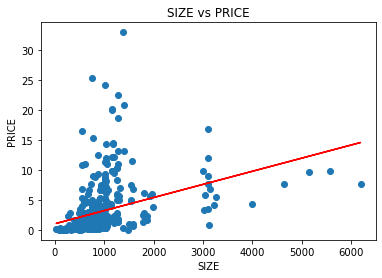

In [27]:
plt.scatter(X_1, Y_1)
plt.plot(X_1, price_eq, c = "red")
plt.xlabel("SIZE")
plt.ylabel("PRICE")
plt.title("SIZE vs PRICE")
plt.show()

In [28]:
predict_1.shape

(9, 1)

In [29]:
X_test_1.shape

(9, 1)

In [30]:
# error_diff = abs(Y_1-price_eq)
# error_sq = error_diff**2
# error_sq_sum = np.sum(error_sq)
# error_sq_sum/(Y_1.shape[0])

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mean_squared_error(Y_test_1, predict_1)

8.615917195767048

                                    Simple Linear Regression Model 2

In [33]:
# Taking independent variable as HEIGHT, PRICE as dependent

In [34]:
data_set_2 = data_set.copy()
data_set_2.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [35]:
X_2 = data_set_2.iloc[:, 1:2].values
X_2.shape

(430, 1)

In [36]:
Y_2 = data_set_2.iloc[:, 0:1].values
Y_2.shape

(430, 1)

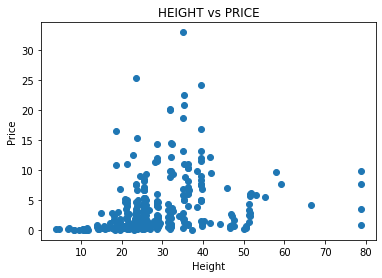

In [37]:
plt.scatter(X_2, Y_2)
plt.xlabel("Height")
plt.ylabel("Price")
plt.title("HEIGHT vs PRICE")
plt.show()

In [38]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size = 0.05)

In [39]:
theta0 = 0
theta1 = 0
alpha = 0.0001 # learning rate
m = float(len(X_train_2))
for x in range(len(X_train_2)):
    pred_val = theta0 + theta1*X_train_2
    diff_intercept = (-1/m) * (sum(Y_train_2 - pred_val)) # Actual - pred
    diff_slope = (-1/m) * (sum((Y_train_2 - pred_val) * X_train_2))
    theta0 = theta0 - alpha*diff_intercept
    theta1 = theta1 - alpha*diff_slope
print(theta0, theta1)

[0.00068845] [0.11401778]


In [40]:
model_2_eq_pred = theta0 + theta1*X_train_2

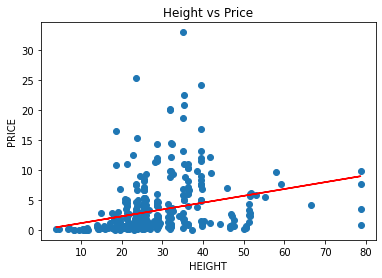

In [41]:
plt.scatter(X_2, Y_2)
plt.plot(X_train_2, model_2_eq_pred, c = "red")
plt.xlabel("HEIGHT")
plt.ylabel("PRICE")
plt.title("Height vs Price")
plt.show()

In [42]:
predict_test = theta0 + theta1*X_test_2

In [43]:
mean_squared_error(Y_test_2, predict_test)

20.659712162567875

                                        MultiLinear Regression Model

In [6]:
data_set_3 = data_set.copy()

In [7]:
data_set_3.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [8]:
# Normalization of raw data using min-max feature scaling

for column in data_set_3:
    data_set_3[column] = (data_set_3[column] - data_set_3[column].min())/(data_set_3[column].max() - data_set_3[column].min())
data_set_3.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,0.120697,0.232620,0.229648,1.0,0.000000,0.0
1,0.266326,0.374332,0.229648,1.0,0.002591,0.5
2,0.003675,0.040107,0.111786,0.0,0.005181,1.0
3,0.061421,0.291444,0.307412,1.0,0.007772,0.5
4,0.044756,0.291444,0.307412,1.0,0.007772,0.5


In [9]:
Y_3_price = data_set_3.iloc[:, 0:1]
Y_3_price

,PRICE
0,0.120697
1,0.266326
2,0.003675
3,0.061421
4,0.044756
...,...
425,0.159745
426,0.283067
427,0.249737
428,0.103008


In [10]:
X_3_independent = data_set_3.iloc[:, 1:4]

In [11]:
X_3_independent

,HEIGHT,WIDTH,SIGNED
0,0.232620,0.229648,1.0
1,0.374332,0.229648,1.0
2,0.040107,0.111786,0.0
3,0.291444,0.307412,1.0
4,0.291444,0.307412,1.0
...,...,...,...
425,0.290107,0.397327,1.0
426,0.294118,0.399757,1.0
427,0.290107,0.399757,1.0
428,0.290107,0.397327,1.0


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3_independent, Y_3_price, test_size = 0.05)

In [14]:
X_train_3

,HEIGHT,WIDTH,SIGNED
228,0.157754,0.295261,1.0
96,0.263369,0.267315,0.0
11,0.290107,0.358445,1.0
207,0.331551,0.397327,1.0
4,0.291444,0.307412,1.0
...,...,...,...
309,0.189840,0.270960,1.0
87,0.263369,0.267315,0.0
293,0.290107,0.358445,1.0
421,0.232620,0.269745,1.0


In [15]:
model_3 = LinearRegression()

In [16]:
model_3.fit(X_train_3, Y_train_3)

LinearRegression()

In [17]:
predict_3 = model_3.predict(X_test_3)
predict_3.shape

(22, 1)

In [18]:
predict_3

array([[0.14453172],
       [0.06867018],
       [0.09116258],
       [0.11761322],
       [0.09770151],
       [0.09759698],
       [0.03955659],
       [0.0584453 ],
       [0.07917094],
       [0.09297034],
       [0.07803656],
       [0.09782832],
       [0.12438353],
       [0.10164958],
       [0.09759698],
       [0.13252987],
       [0.10869753],
       [0.09736565],
       [0.13470953],
       [0.04176198],
       [0.07689191],
       [0.11203896]])

In [55]:
theta0 = model_3.intercept_
theta0

array([-0.10715037])

In [56]:
theta1 = model_3.coef_
theta1

array([[0.20512497, 0.258448  , 0.06642157]])

In [57]:
mean_squared_error(Y_test_3, predict_3)

0.019940614729299828